In [1]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

Load train & test files

In [2]:
files_train = 0
files_validation = 0
cwd = os.getcwd()
folder = 'train_data/train'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_train +=len(files)
    
folder = 'train_data/test'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_validation +=len(files)

print(files_train, files_validation)

432 164


Set key parameters

In [3]:
img_width, img_height = 48,48
train_data_dir = 'train_data/train'
validation_data_dir = 'train_data/test'
nb_train_sample = files_train
nb_validation_sample = files_validation
batch_size = 32
epochs = 15
num_classes = 2

Build model on top of a pretrained VGG

In [4]:
model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))

In [5]:
model.layers

In [6]:
for layer in model.layers[:10]:
    layer.traiable = False

In [7]:
x = model.output
x = Flatten()(x)

predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)

model_final.compile(loss = 'categorical_crossentropy', 
                    optimizer = optimizers.SGD(lr = 0.0001, momentum=0.9), 
                    metrics=['accuracy'])

c:\Users\HP\anaconda3\envs\parking\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Data Augumentation

In [8]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest',zoom_range=0.1, width_shift_range=0.1, 
                  height_shift_range=0.1, rotation_range=5)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width), 
                                 batch_size = batch_size, class_mode = 'categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [9]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [11]:
import scipy

In [12]:
history = model_final.fit(
train_generator, steps_per_epoch=nb_train_sample//batch_size, 
    validation_steps=nb_validation_sample//batch_size, 
epochs = epochs, validation_data=validation_generator)

Epoch 1/15
13/13 [==============================] - 17s 1s/step - loss: 0.6104 - accuracy: 0.6200 - val_loss: 0.4355 - val_accuracy: 0.7688
Epoch 2/15
13/13 [==============================] - 14s 1s/step - loss: 0.3185 - accuracy: 0.8475 - val_loss: 0.2738 - val_accuracy: 0.9062
Epoch 3/15
13/13 [==============================] - 14s 1s/step - loss: 0.2159 - accuracy: 0.9600 - val_loss: 0.2818 - val_accuracy: 0.8813
Epoch 4/15
13/13 [==============================] - 14s 1s/step - loss: 0.1883 - accuracy: 0.9275 - val_loss: 0.2416 - val_accuracy: 0.9062
Epoch 5/15
13/13 [==============================] - 14s 1s/step - loss: 0.1463 - accuracy: 0.9675 - val_loss: 0.2217 - val_accuracy: 0.9187
Epoch 6/15
13/13 [==============================] - 14s 1s/step - loss: 0.1244 - accuracy: 0.9750 - val_loss: 0.2284 - val_accuracy: 0.9125
Epoch 7/15
13/13 [==============================] - 14s 1s/step - loss: 0.1068 - accuracy: 0.9688 - val_loss: 0.2060 - val_accuracy: 0.9250
Epoch 8/15
13/13 [==

In [13]:
history.history

{'loss': [0.6103821396827698,
  0.31849679350852966,
  0.21594642102718353,
  0.18826942145824432,
  0.1462637335062027,
  0.12442291527986526,
  0.10676494985818863,
  0.09593350440263748,
  0.06362852454185486,
  0.06182970851659775,
  0.06650593131780624,
  0.05435216799378395,
  0.04951002448797226,
  0.04035085067152977,
  0.04892171919345856],
 'accuracy': [0.6200000047683716,
  0.8475000262260437,
  0.9599999785423279,
  0.9275000095367432,
  0.9674999713897705,
  0.9750000238418579,
  0.96875,
  0.9775000214576721,
  0.987500011920929,
  0.9800000190734863,
  0.9750000238418579,
  0.987500011920929,
  0.9825000166893005,
  0.9900000095367432,
  0.9900000095367432],
 'val_loss': [0.4355294704437256,
  0.2737721800804138,
  0.28177064657211304,
  0.24155767261981964,
  0.22169065475463867,
  0.2283550202846527,
  0.20601622760295868,
  0.15343347191810608,
  0.17141373455524445,
  0.17397335171699524,
  0.16767475008964539,
  0.170336052775383,
  0.19580230116844177,
  0.15791282

In [16]:
!pip install matplotlib

  Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp39-cp39-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp39-cp39-win_amd64.whl (2.2 MB)
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


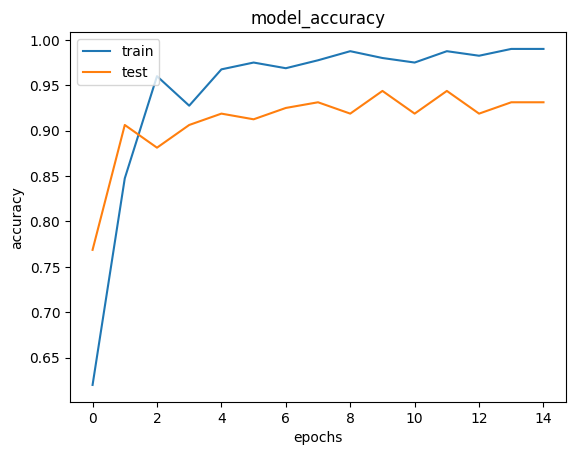

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

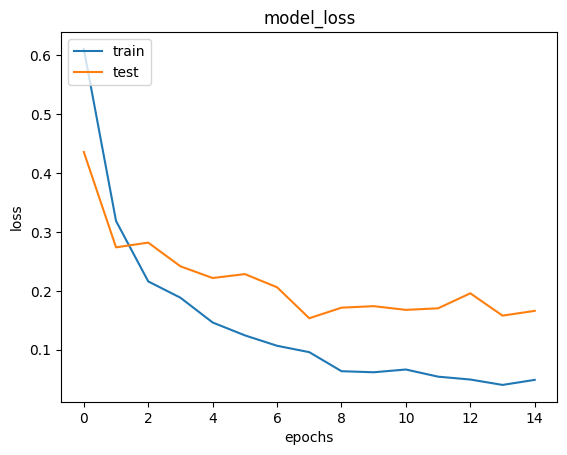

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [19]:
model_final.save('model_final.h5')

In [20]:
class_dictionary = {}
class_dictionary[0]  = 'no_car'
class_dictionary[1]  = 'car'

In [21]:
class_dictionary

{0: 'no_car', 1: 'car'}

Predictive System

In [22]:
import cv2
import numpy as np

def make_prediction(image):
    image = cv2.imread(image)
    image = cv2.resize(image, (48, 48))
    img = image/255
#     (1, 48, 48, 3) -> 4D Tensor
    img = np.expand_dims(img, axis = 0)
    
    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label

In [23]:
model_final.save("model_final.h5")